K-Means Implementation:

In [89]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# reading csv file using pandas
cleaned_data = pd.read_csv("cleaned_dataset.csv")

In [90]:
# drop categorical columns
numeric = cleaned_data.select_dtypes(include=[np.float64])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

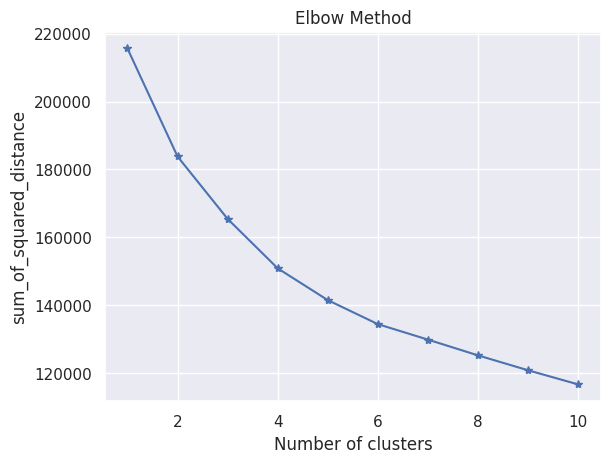

In [91]:
# Elbow Method Analysis to select k

sum_of_squared_distance = []

# Loop through different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(numeric)
    sum_of_squared_distance.append(kmeans.inertia_)  # Inertia is the WCSS value

# display Elbow curve
plt.plot(range(1, 11), sum_of_squared_distance, marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sum_of_squared_distance')
plt.grid(True)
plt.show()


In [92]:
inertia_df = pd.DataFrame({'K': range(1, 11), 'Inertia': sum_of_squared_distance})

# Display the table of inertia values for each K
print(inertia_df)

    K        Inertia
0   1  215637.968155
1   2  183793.513836
2   3  165395.198991
3   4  150824.570496
4   5  141450.582752
5   6  134374.284370
6   7  129812.236680
7   8  125166.171864
8   9  120768.255363
9  10  116609.401516


For n_clusters = 2 The average silhouette_score is : 0.14714564257477045
For n_clusters = 3 The average silhouette_score is : 0.14013930608423325
For n_clusters = 4 The average silhouette_score is : 0.1470169353768353
For n_clusters = 5 The average silhouette_score is : 0.14046333005821732
For n_clusters = 6 The average silhouette_score is : 0.15003782527057688
For n_clusters = 7 The average silhouette_score is : 0.14276172296423753
For n_clusters = 8 The average silhouette_score is : 0.13457162155092958


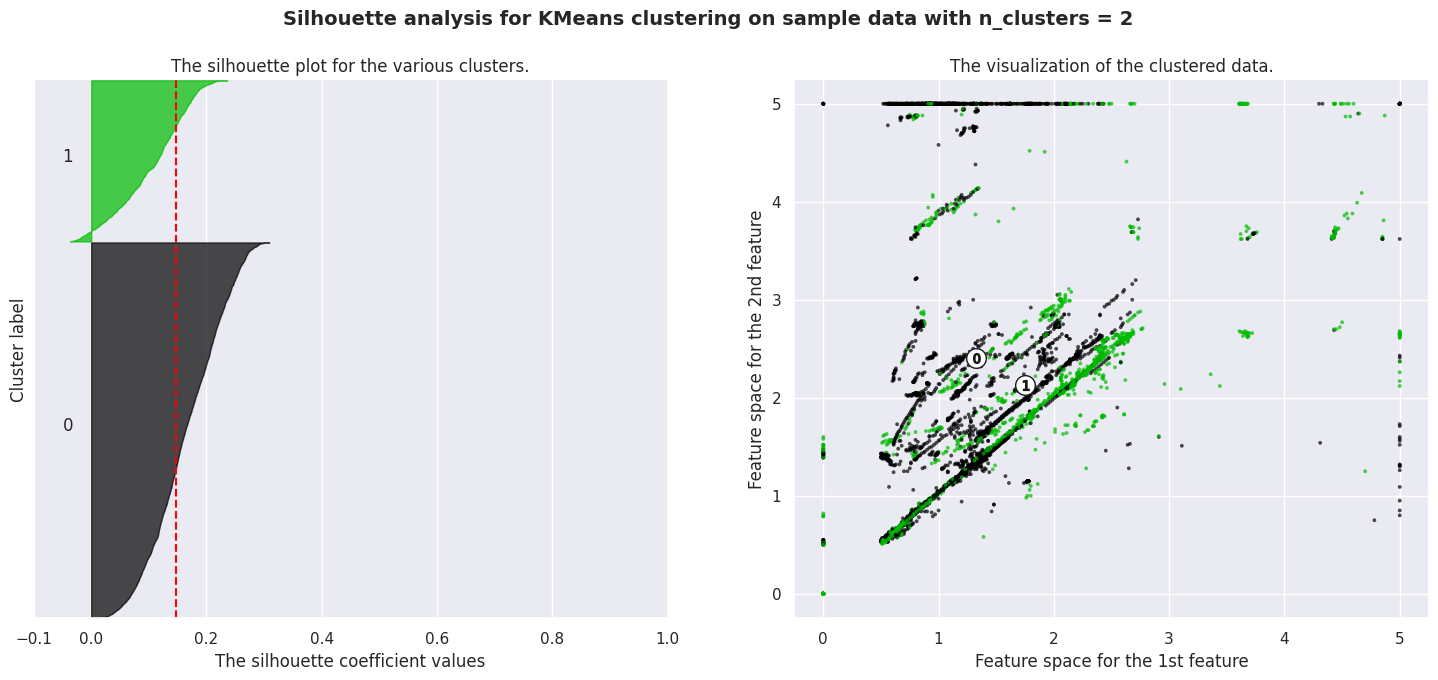

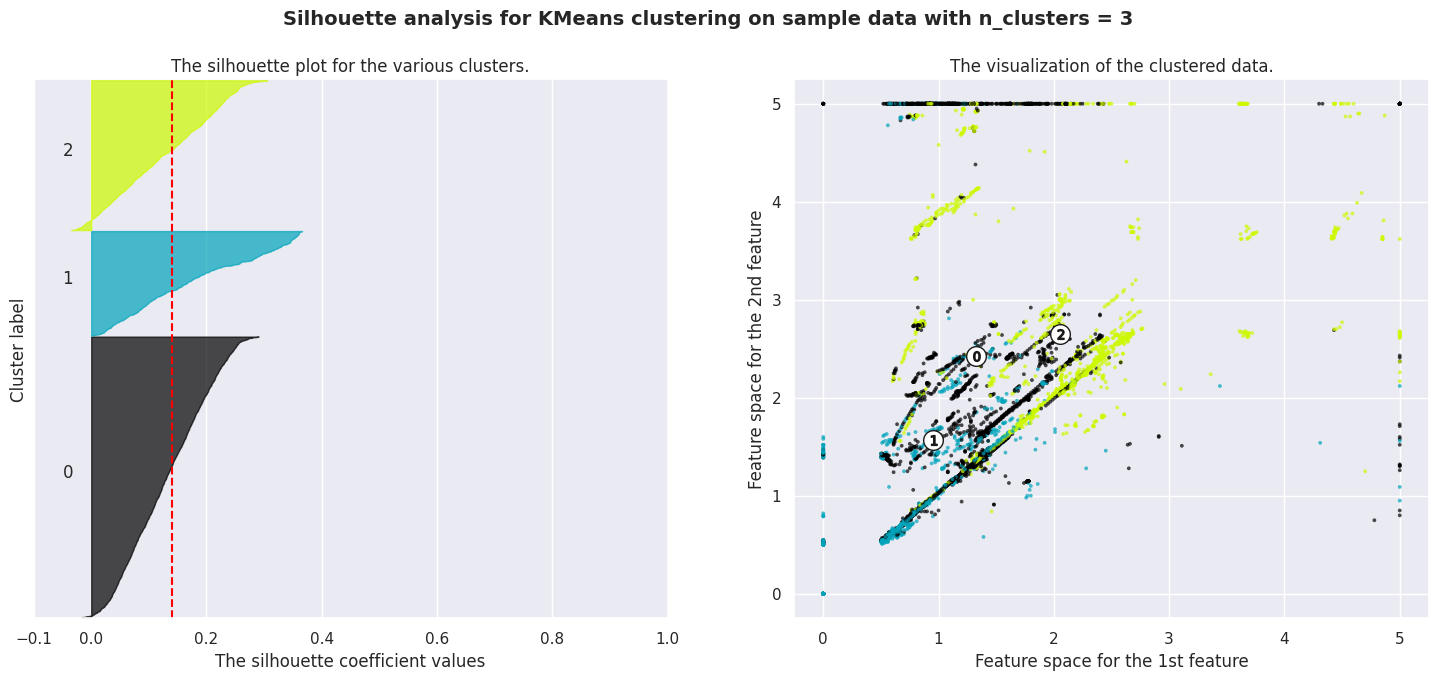

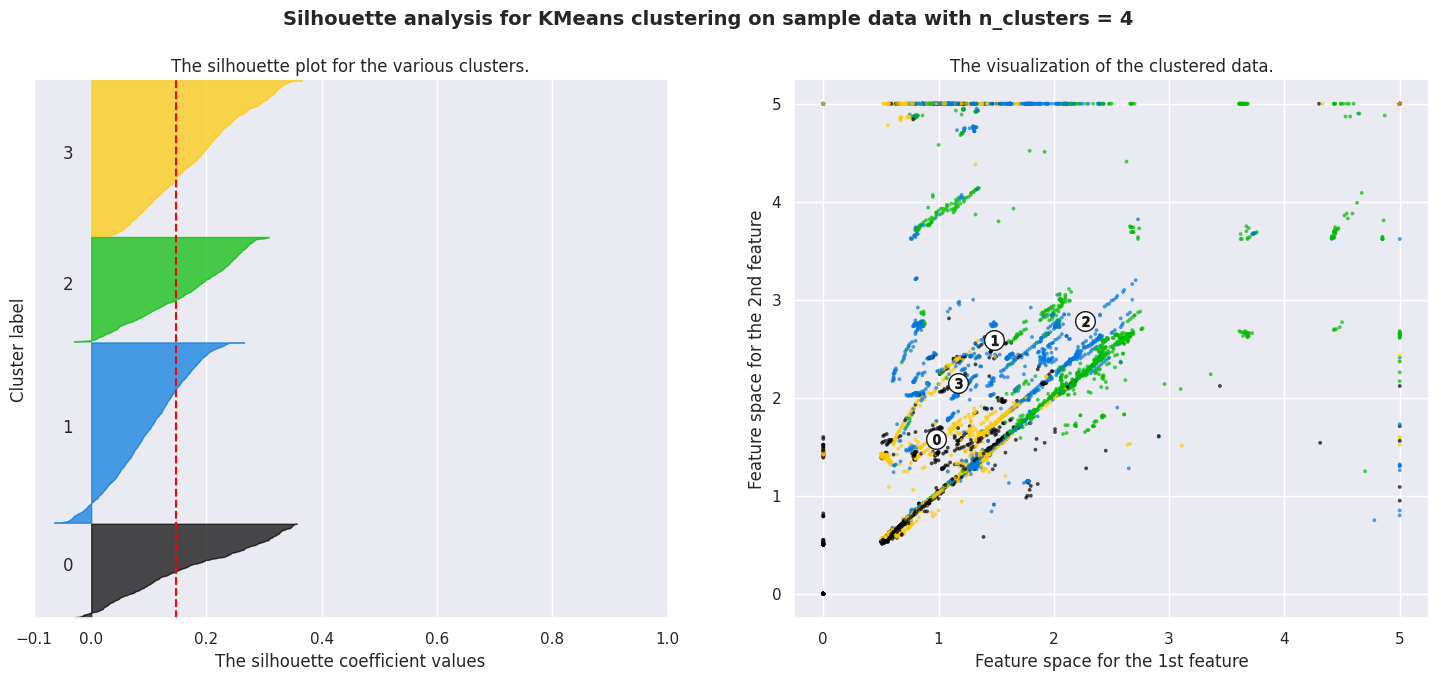

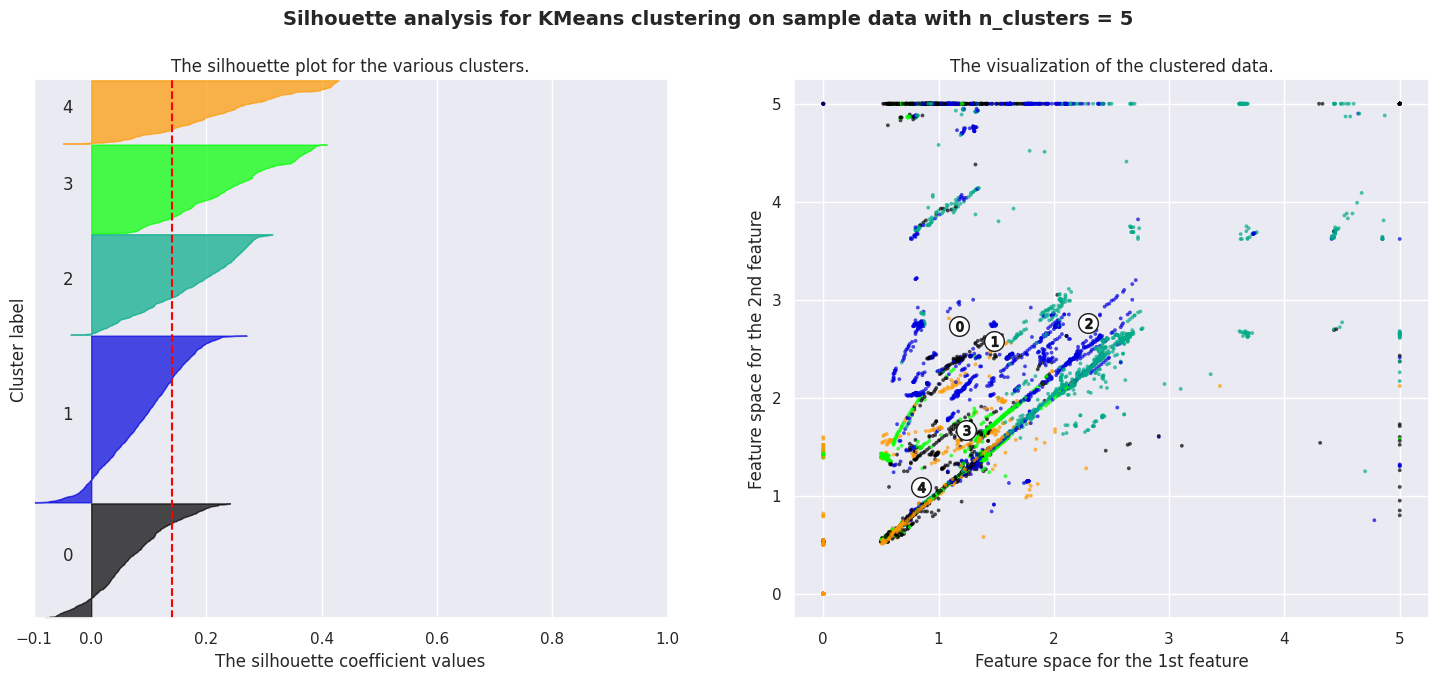

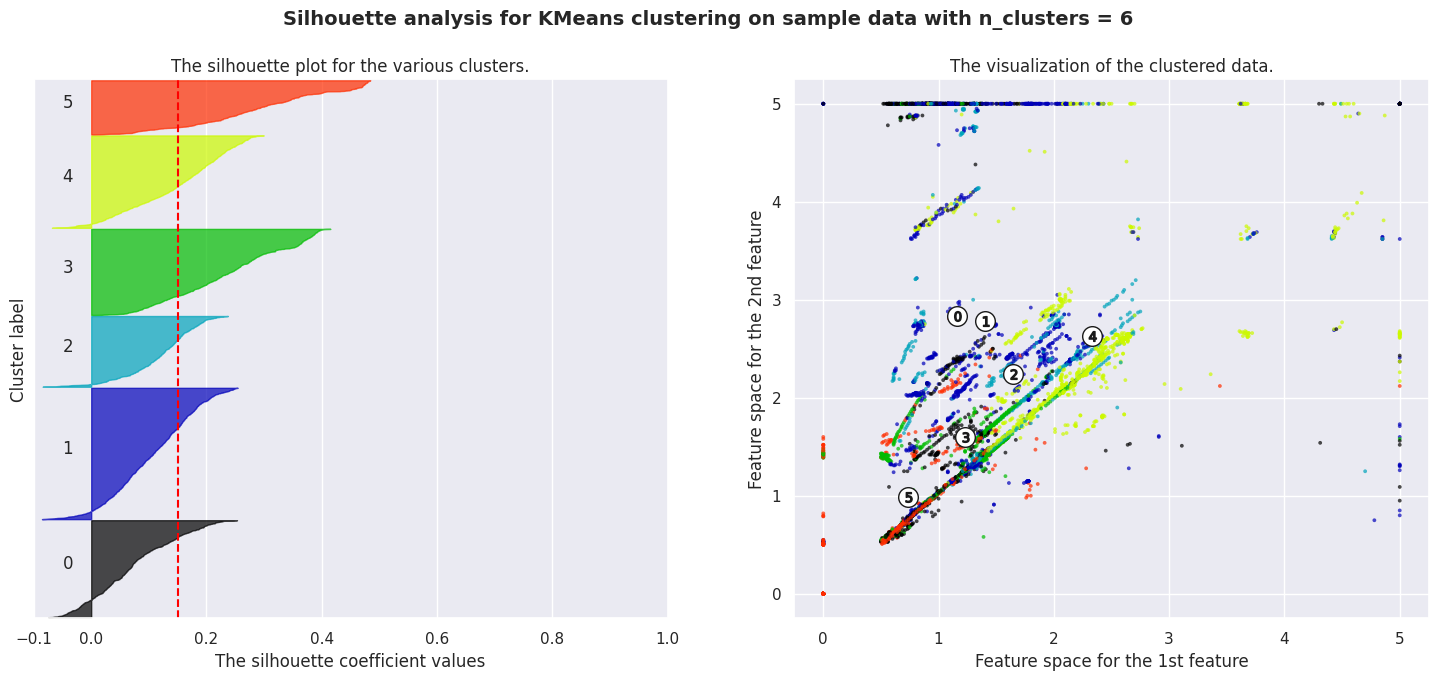

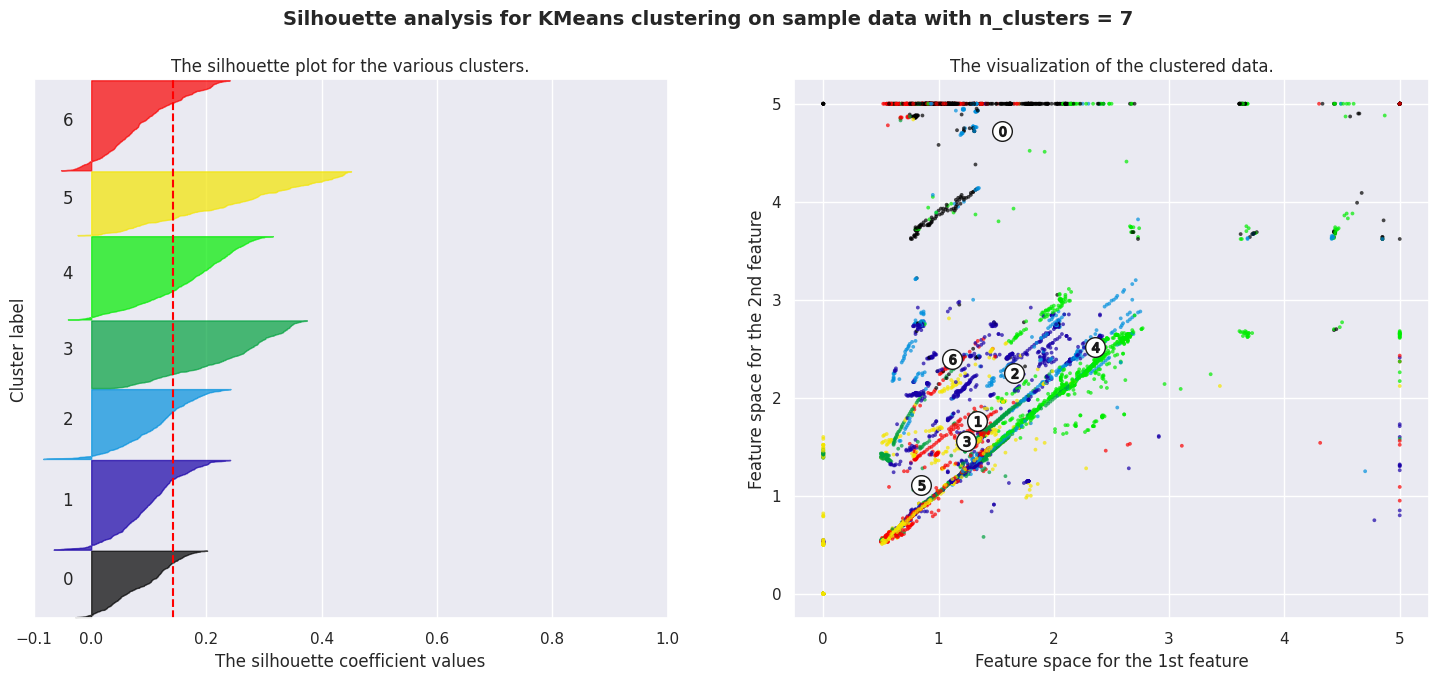

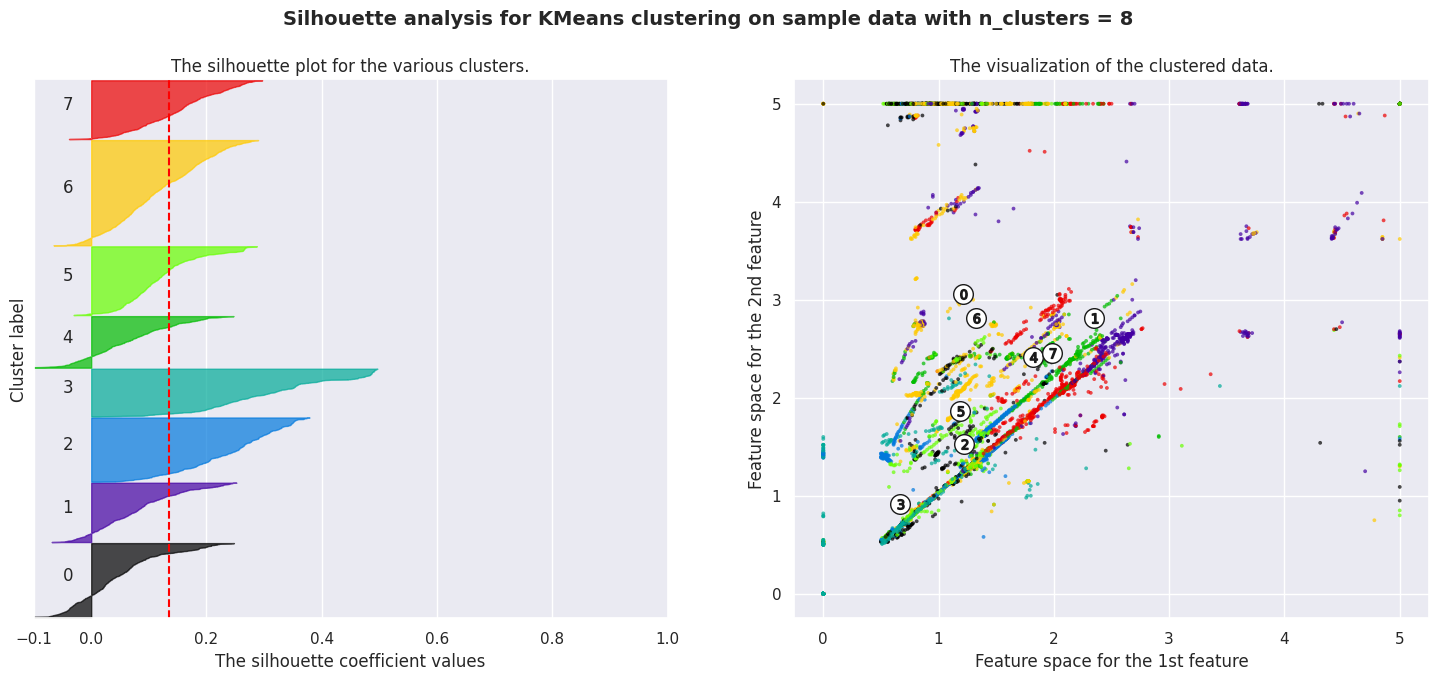

In [93]:
# Silhouette Method Analysis

# Taken and adjusted from sckit-learn


X = numeric.values

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

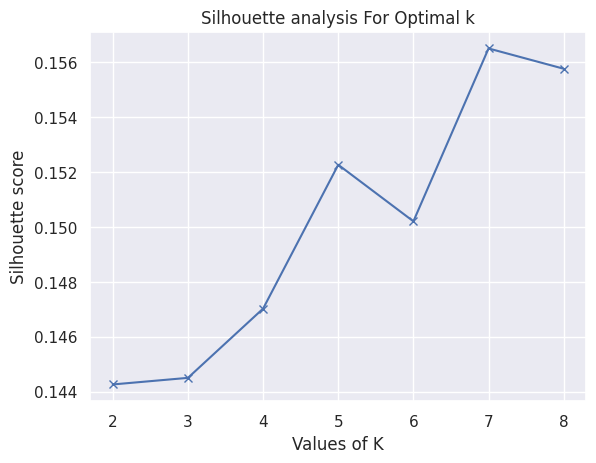

In [94]:
X = numeric.values
sil_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in range_n_clusters:
 kmeans = KMeans(n_clusters = k).fit(X)
 labels = kmeans.labels_
 sil_avg.append(silhouette_score(X, labels, metric = 'euclidean'))


plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [95]:
# implement k-means
X = numeric.values
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
numeric['cluster_label'] = labels
print(numeric.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   churches  resorts  beaches  parks  theatres  museums  malls  zoos  \
0       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.35   
1       0.0      0.0     3.63   3.65       5.0     2.92    5.0  2.64   
2       0.0      0.0     3.63   3.63       5.0     2.92    5.0  2.64   
3       0.0      0.5     3.63   3.63       5.0     2.92    5.0  2.35   
4       0.0      0.0     3.63   3.63       5.0     2.92    5.0  2.64   

   restaurants  pubs  ...  dance_clubs  swimming_pools  gyms  bakeries  \
0         2.33  2.64  ...         0.59             0.5   0.0       0.5   
1         2.33  2.65  ...         0.59             0.5   0.0       0.5   
2         2.33  2.64  ...         0.59             0.5   0.0       0.5   
3         2.33  2.64  ...         0.59             0.5   0.0       0.5   
4         2.33  2.64  ...         0.59             0.5   0.0       0.5   

   beauty_spas  cafes  view_points  monuments  gardens  cluster_label  
0          0.0    0.0          0.0        0.0     

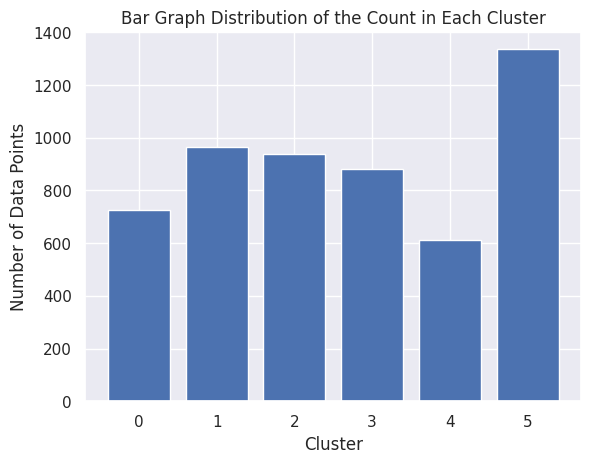

In [96]:
# display counts in each cluster
cluster_counts = numeric['cluster_label'].value_counts()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Bar Graph Distribution of the Count in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()

In [97]:
# Create a DataFrame from cluster_counts
result_table = pd.DataFrame({'Cluster': cluster_counts.index, 'Number of Data Points': cluster_counts.values})

# Display the DataFrame
print(result_table)

   Cluster  Number of Data Points
0        5                   1335
1        1                    963
2        2                    936
3        3                    882
4        0                    726
5        4                    613


<ipython-input-98-664718223c07>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_final = pd.concat([df_final,cl],1)
<ipython-input-98-664718223c07>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(y='categories',x='value',data=df_long[df_long['Cluster']==i], palette = 'Set3', ci=None,estimator=np.median)
<ipython-input-98-664718223c07>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(y='categories',x='value',data=df_long[df_long['Cluster']==i], palette = 'Set3', ci=None,estimator=np.median)
<ipython-input-98-664718223c07>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(y='categories',x='value',data=df_long[df_long['Cluster']==i], palette = 'Set3', ci=None,estimator=np.median)
<ipython-input-98-664718223c07>:11:

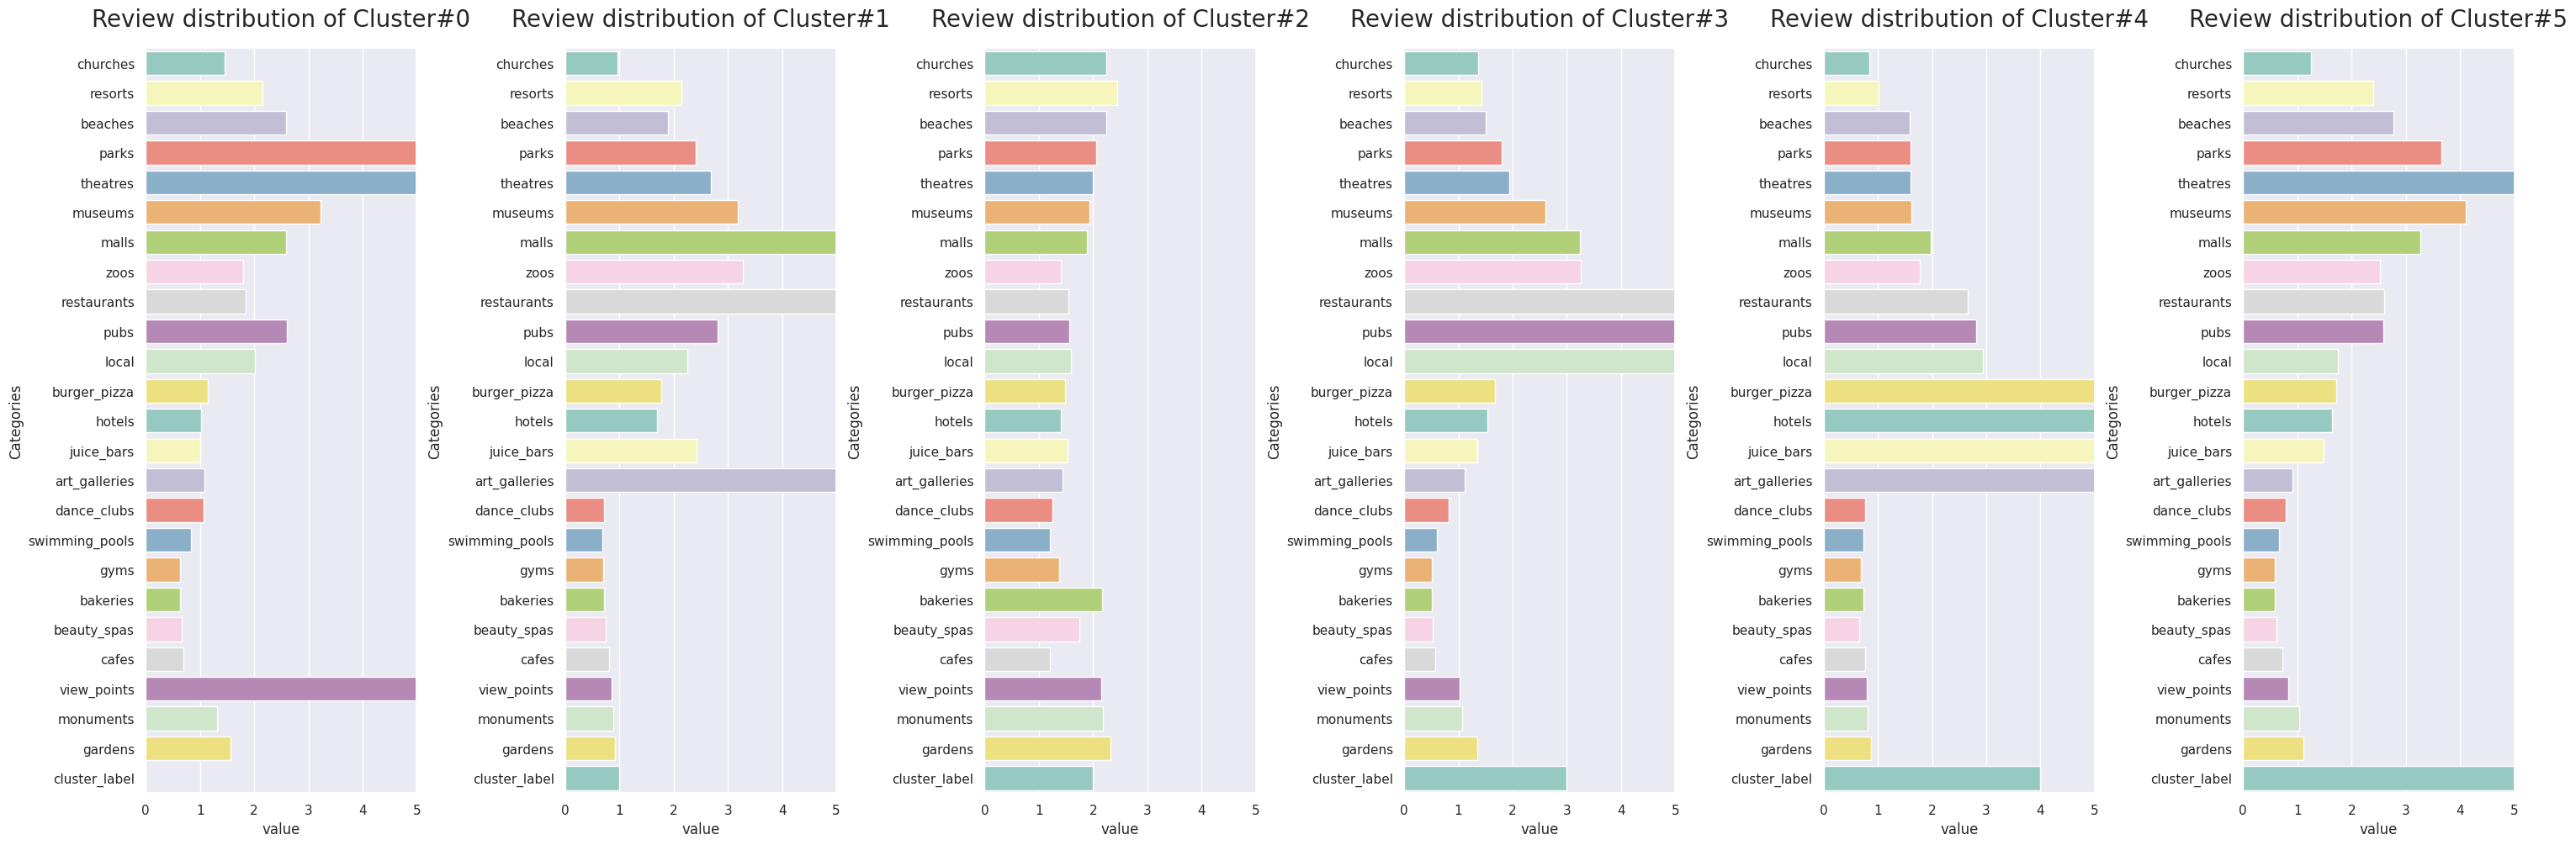

In [98]:
# Display Distribution of Clusters
cl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
cl.value_counts()
df_final = numeric.copy()
df_final = pd.concat([df_final,cl],1)
df_long = pd.melt(df_final, "Cluster", var_name="categories")

fig = plt.figure(figsize = (30,10))
for i in range(len(df_long.Cluster.unique())):
    plt.subplot(1,len(df_long.Cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['Cluster']==i], palette = 'Set3', ci=None,estimator=np.median)
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)

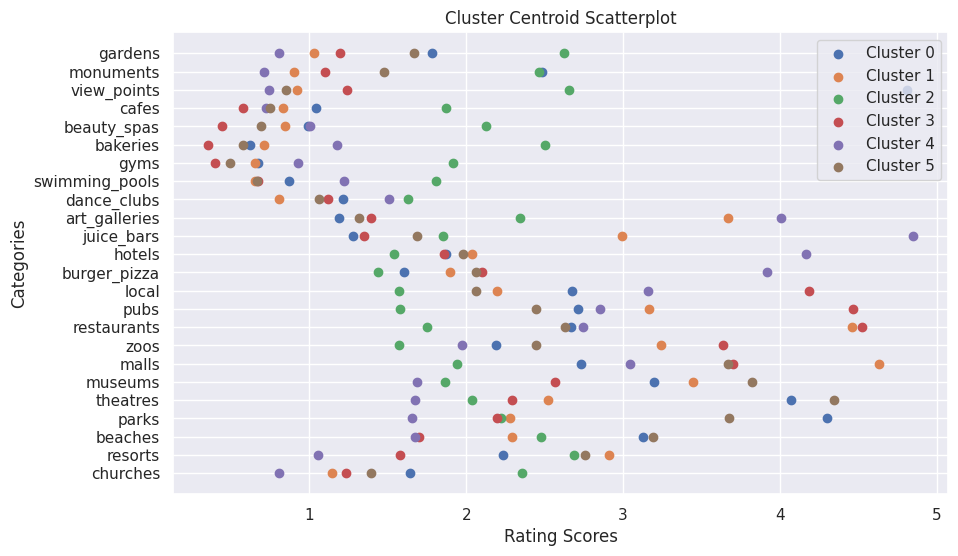

In [99]:
# Create a DataFrame for cluster centroids
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=numeric.drop('cluster_label', axis=1).columns)

# Plot the cluster centroid scatterplot
plt.figure(figsize=(10, 6))
for i in range(len(cluster_centroids)):
    plt.scatter(cluster_centroids.loc[i], cluster_centroids.columns, label=f'Cluster {i}')
plt.xlabel('Rating Scores')
plt.ylabel('Categories')
plt.title('Cluster Centroid Scatterplot')
plt.legend()
plt.show()


In [104]:
# Provide an example of the use of the algorithm by a traveler

# retrieve users column from old dataset
user_column = cleaned_data['user']
# add users column into cleaned dataset
numeric['user'] = user_column

# Move 'user' to first column
cols = numeric.columns.tolist()  # list of column names
cols.insert(0, cols.pop(cols.index('user')))  # Move 'user' to first column
example = numeric[cols]


print(example.iloc[0])
print(example.iloc[78])

user              user_1
churches             0.0
resorts              0.0
beaches             3.63
parks               3.65
theatres             5.0
museums             2.92
malls                5.0
zoos                2.35
restaurants         2.33
pubs                2.64
local                1.7
burger_pizza        1.69
hotels               1.7
juice_bars          1.72
art_galleries       1.74
dance_clubs         0.59
swimming_pools       0.5
gyms                 0.0
bakeries             0.5
beauty_spas          0.0
cafes                0.0
view_points          0.0
monuments            0.0
gardens              0.0
cluster_label          5
Name: 0, dtype: object
user              user_79
churches             0.92
resorts              0.96
beaches              0.97
parks                4.64
theatres             3.92
museums               5.0
malls                2.88
zoos                 2.86
restaurants          2.71
pubs                 2.71
local                1.91
burger_pizza   

K-NN Implementation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(numeric.drop('cluster_label', axis=1), numeric['cluster_label'], test_size=0.2, random_state=42)

# KNN Model Training
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

# Predictions on Test Set
y_pred = knn_model.predict(X_test)

# KNN Performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       141
           1       0.88      0.96      0.92       176
           2       0.96      0.98      0.97       188
           3       0.97      0.94      0.95       165
           4       0.98      0.94      0.96       127
           5       0.97      0.93      0.95       294

    accuracy                           0.95      1091
   macro avg       0.95      0.96      0.95      1091
weighted avg       0.95      0.95      0.95      1091



In [25]:
from sklearn.model_selection import cross_val_score

X = numeric.drop('cluster_label', axis=1)
y = numeric['cluster_label']

# Set the number of folds for cross-validation
k_folds = 5

# Perform k-fold cross-validation and get the accuracy scores
accuracy_scores = cross_val_score(knn_model, X, y, cv=k_folds)

# Calculate the mean accuracy across all folds
results = accuracy_scores.mean()
print(f"Mean Accuracy: {results:.2f}")

Mean Accuracy: 0.94


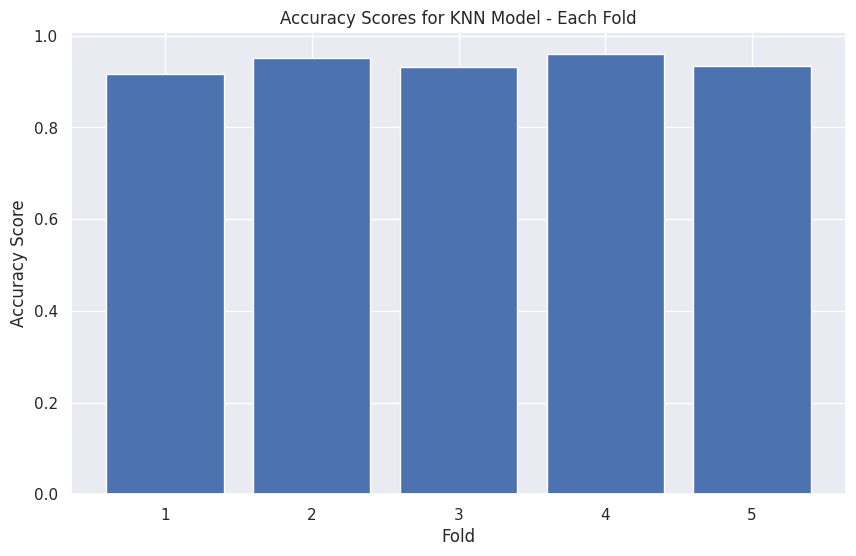

In [26]:
# Plot bar graph for each fold
plt.figure(figsize=(10, 6))
plt.bar(range(1, k_folds+1), accuracy_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for KNN Model - Each Fold')
plt.xticks(range(1, k_folds+1))
plt.show()

<ipython-input-27-f05bc93b5b2c>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='categories', x='value', data=cluster_data, palette='Set3', ci=None, estimator=np.median)
<ipython-input-27-f05bc93b5b2c>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='categories', x='value', data=cluster_data, palette='Set3', ci=None, estimator=np.median)
<ipython-input-27-f05bc93b5b2c>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='categories', x='value', data=cluster_data, palette='Set3', ci=None, estimator=np.median)
<ipython-input-27-f05bc93b5b2c>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='categories', x='value', data=cluster_data, palette='Set3', ci=None, estimator=np.median)
<ipython-input-27-f05bc93b5b2c>:14: FutureWarning: 

The `ci

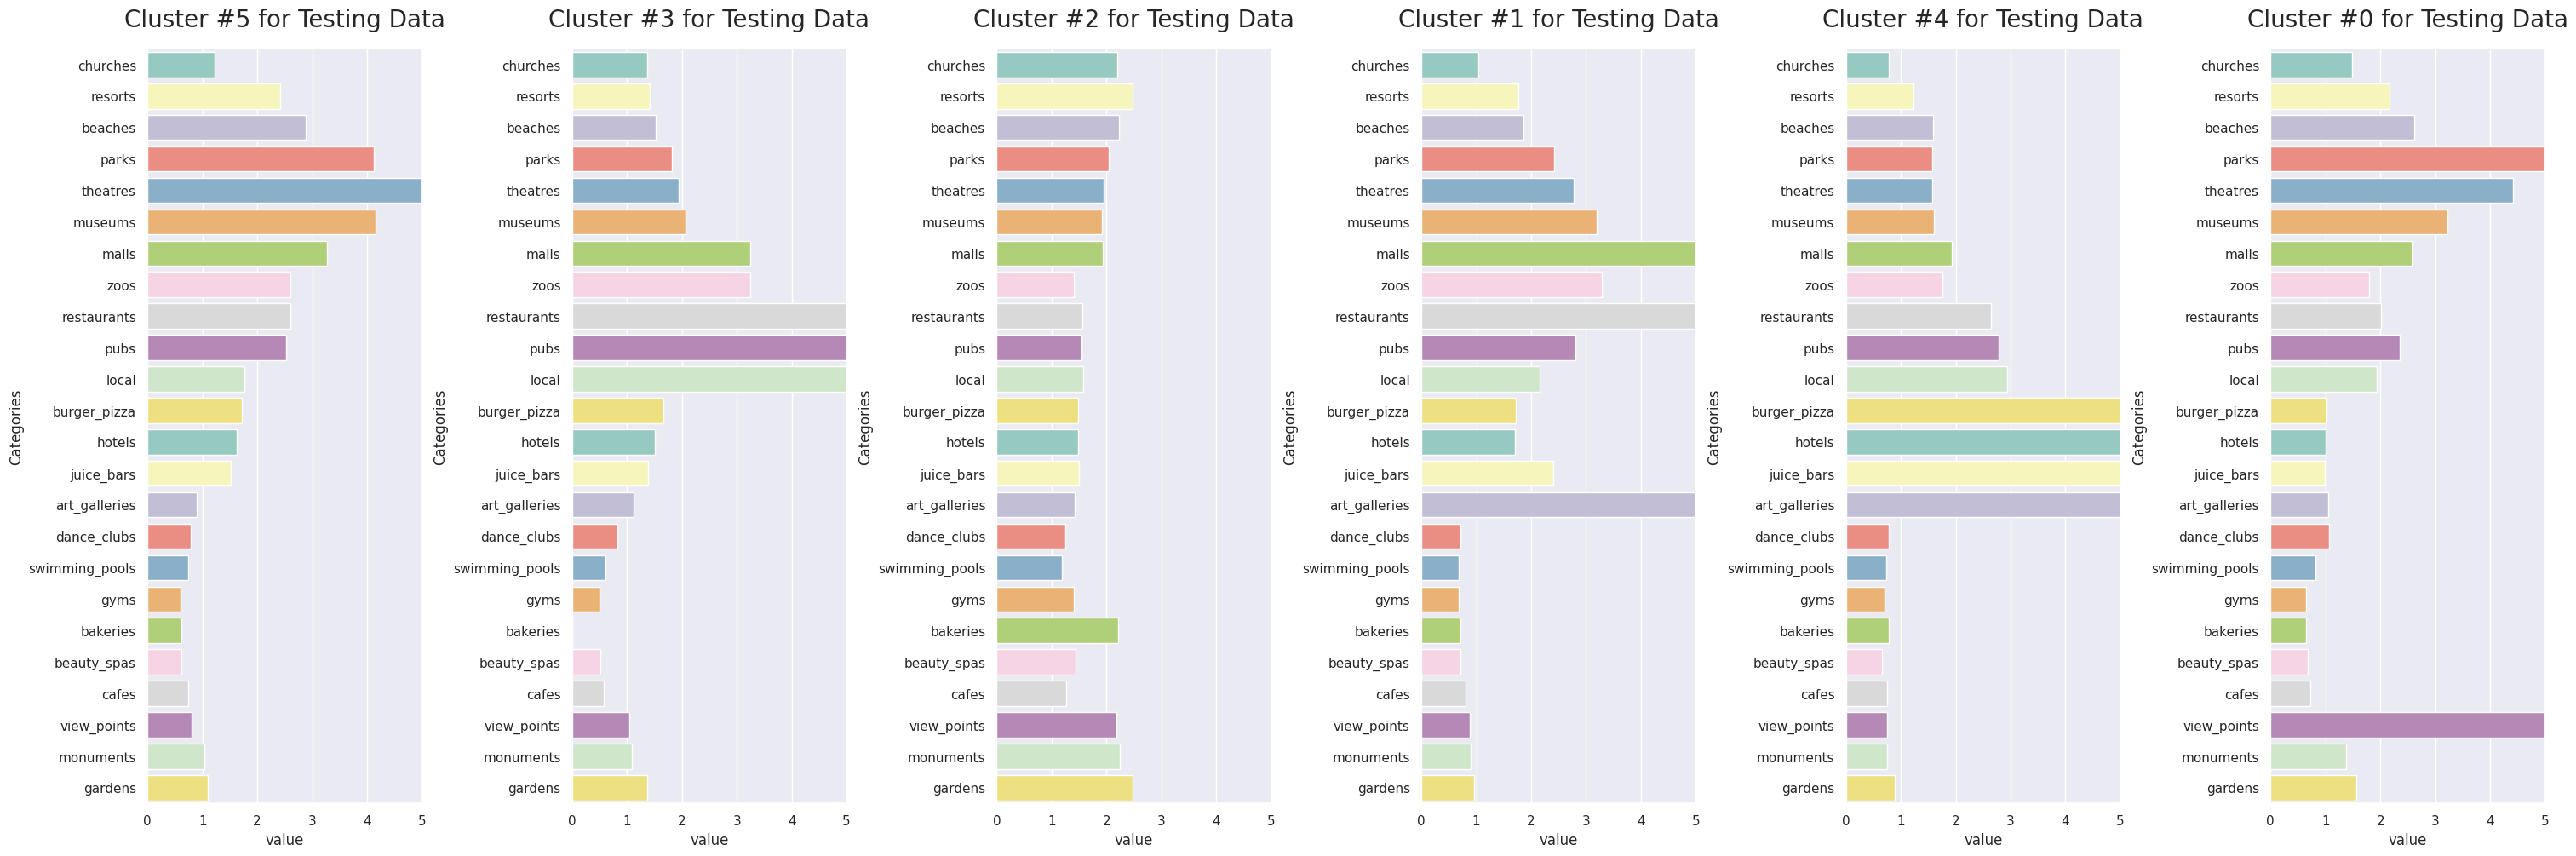

In [27]:
cluster_df = pd.DataFrame({'cluster_label': y_pred}, index=X_test.index)
numeric_with_clusters = pd.concat([X_test, cluster_df], axis=1)

# Melt the DataFrame to convert it into a long format
df_long = pd.melt(numeric_with_clusters, id_vars='cluster_label', var_name='categories')

# Create a figure to plot all the bar plots
fig = plt.figure(figsize=(30, 10))

# Iterate over each cluster and plot the bar graph for categories
for i, cluster in enumerate(df_long['cluster_label'].unique(), 1):
    plt.subplot(1, len(df_long['cluster_label'].unique()), i)
    cluster_data = df_long[df_long['cluster_label'] == cluster]
    sns.barplot(y='categories', x='value', data=cluster_data, palette='Set3', ci=None, estimator=np.median)
    plt.title(f'Cluster #{cluster} for Testing Data', y=1.02, fontsize=20)
    plt.ylabel('Categories')
    plt.xlim(0, 5)

# Adjust the layout to avoid overlapping titles and labels
fig.tight_layout(pad=0.5)
plt.show()

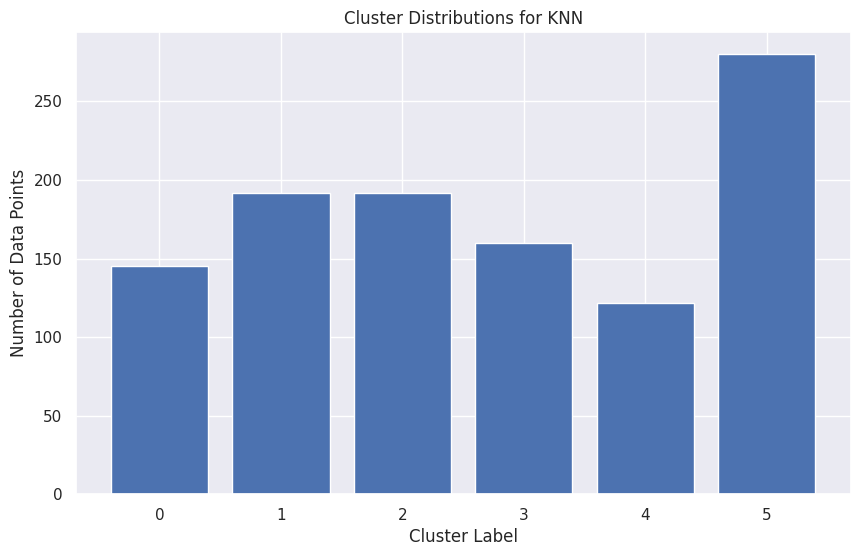

In [28]:
# Count the number of data points in each cluster
cluster_counts = pd.Series(y_pred).value_counts().sort_index()

# Create a bar plot for cluster distributions
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Cluster Distributions for KNN')
plt.show()

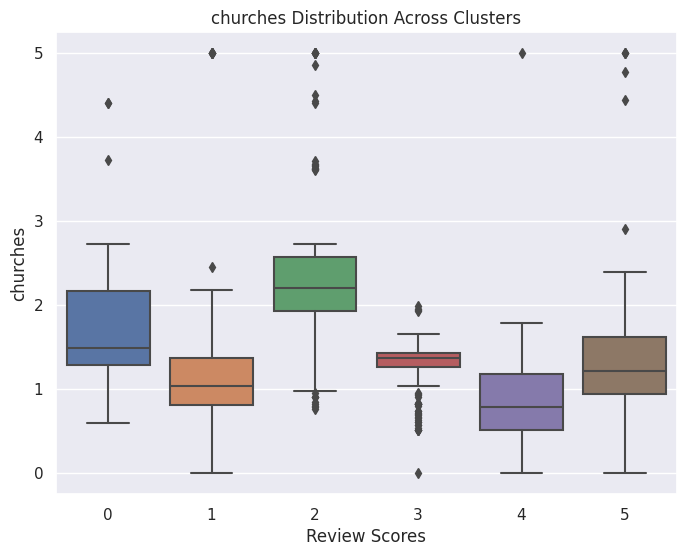

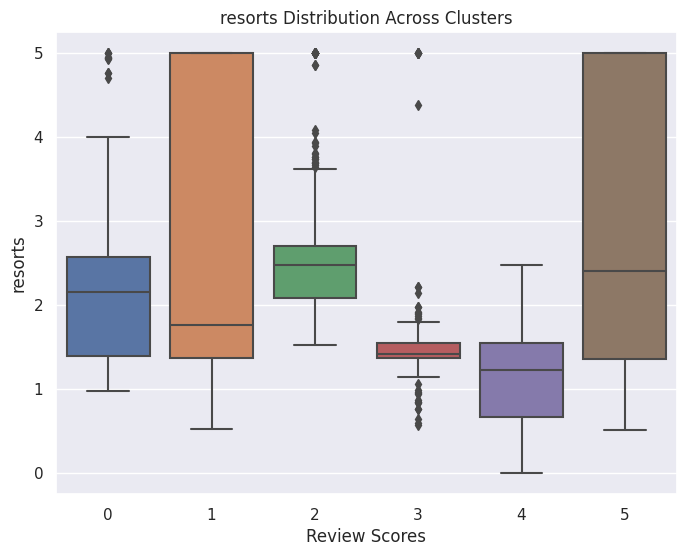

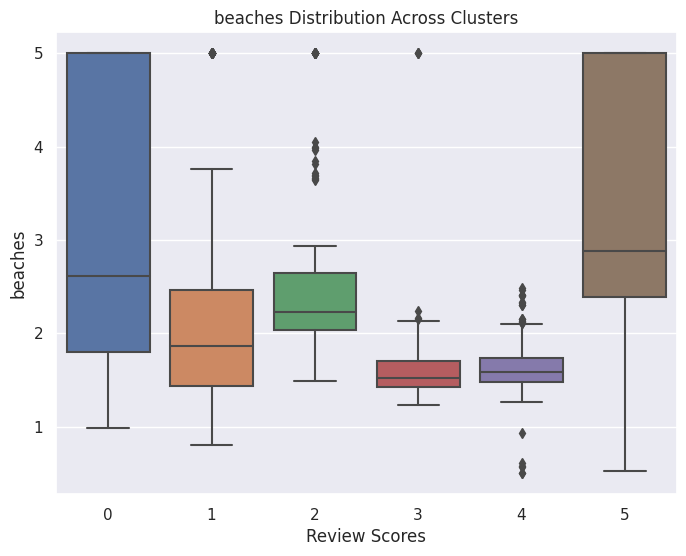

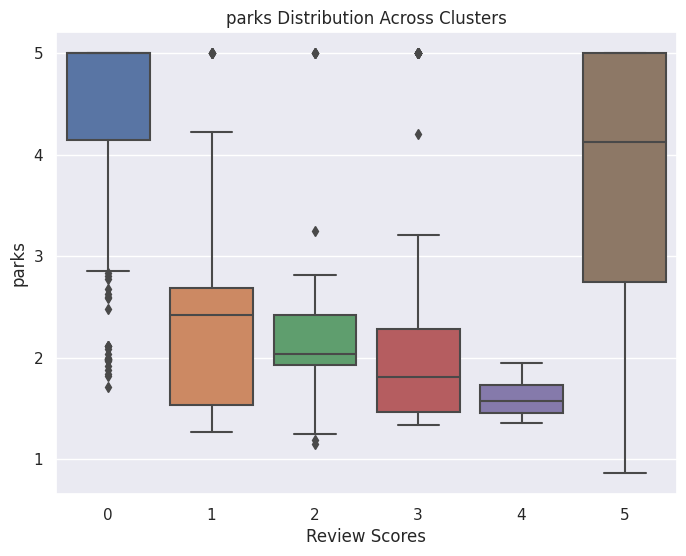

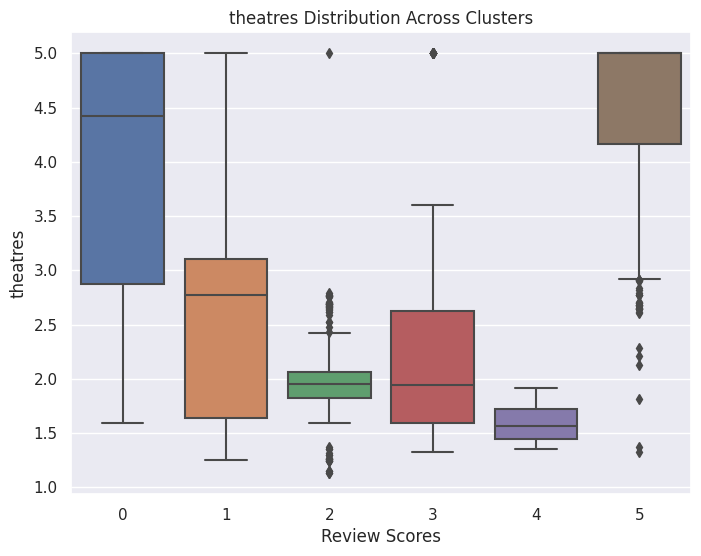

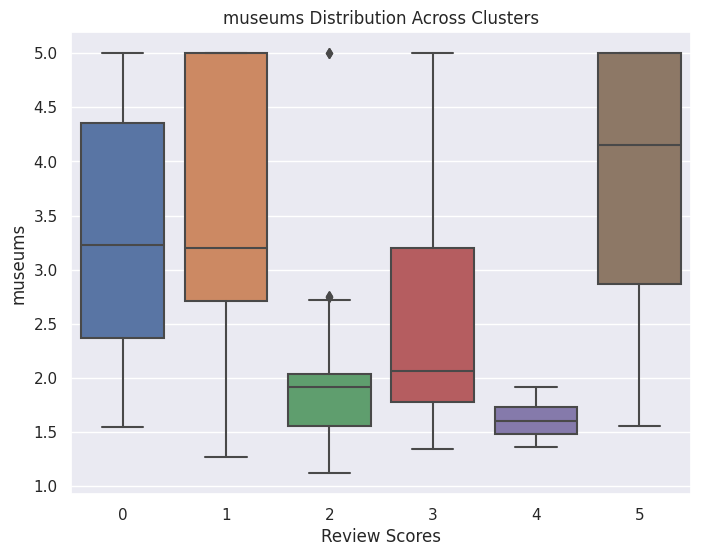

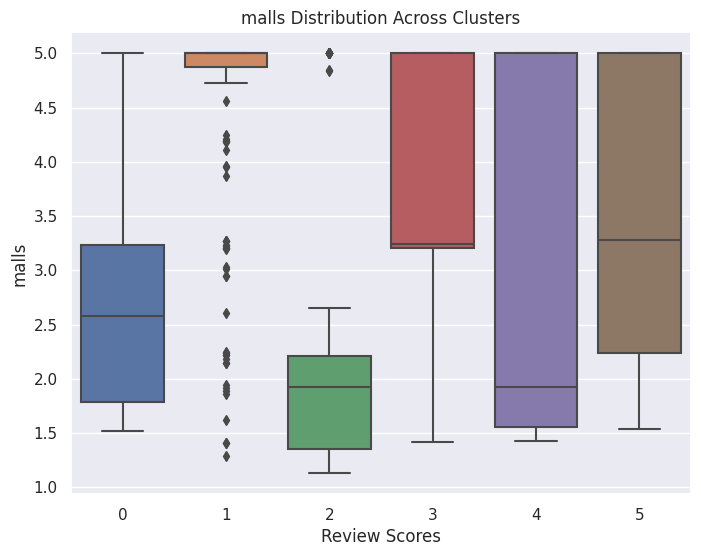

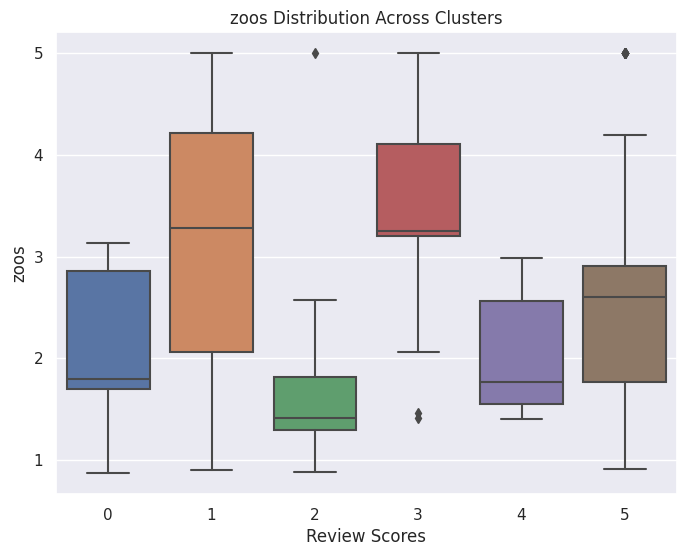

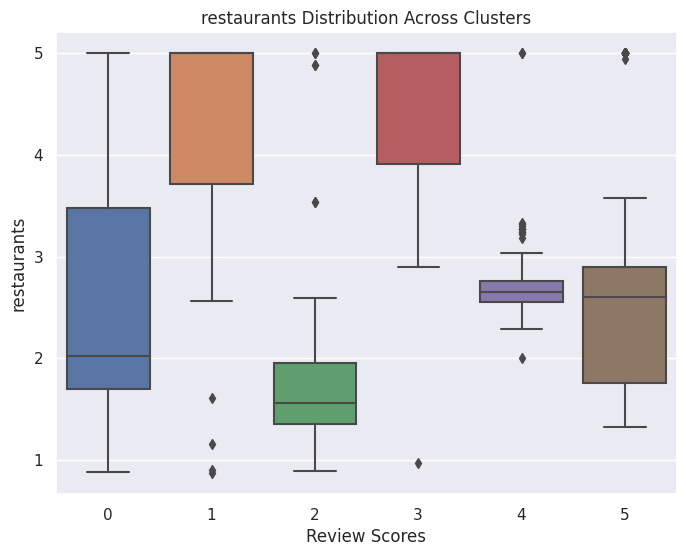

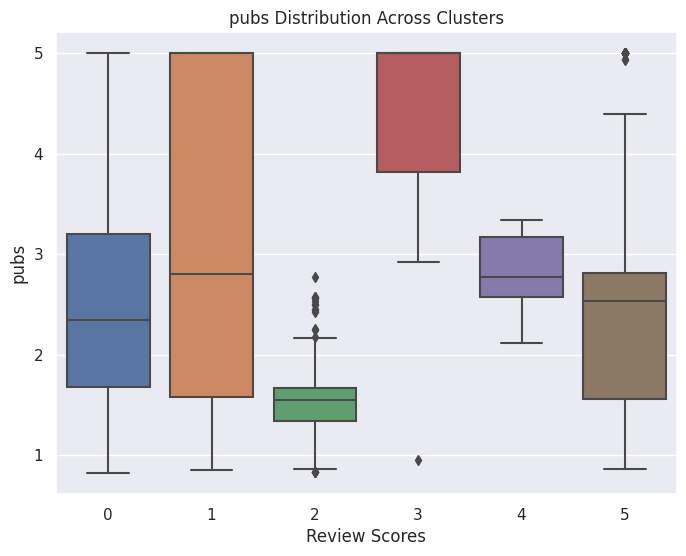

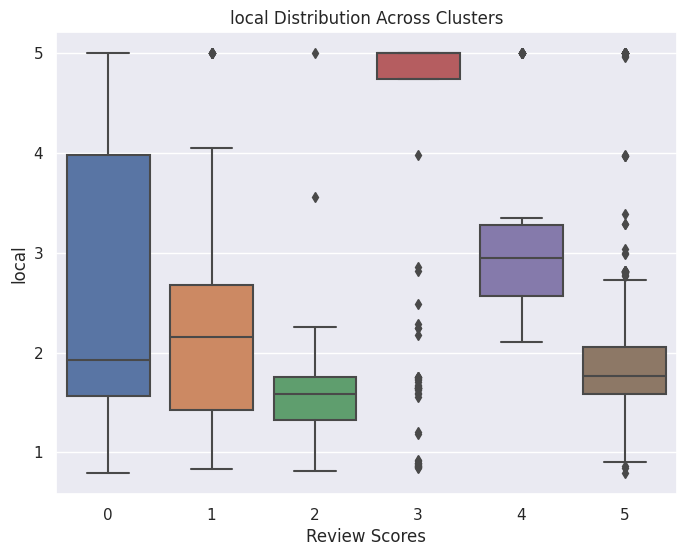

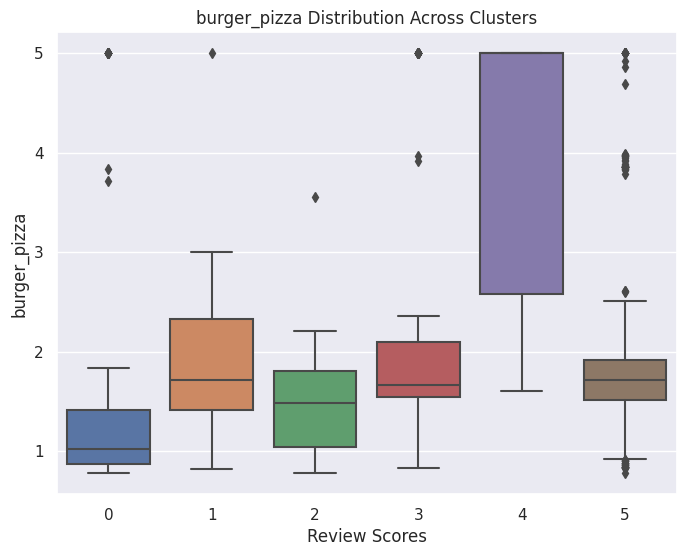

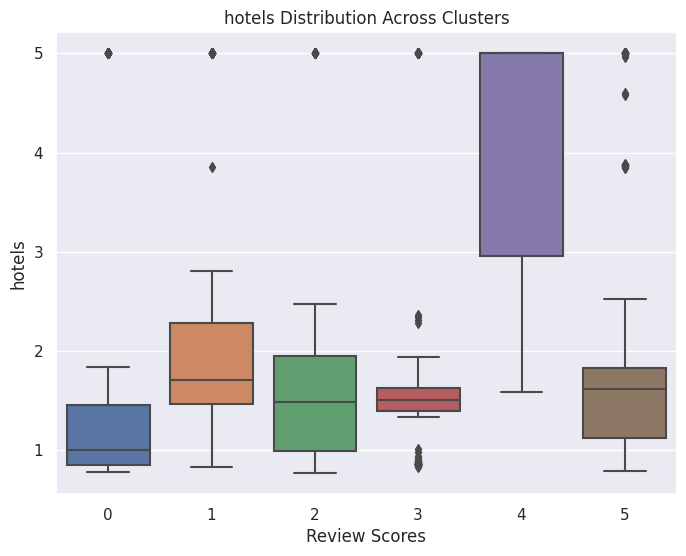

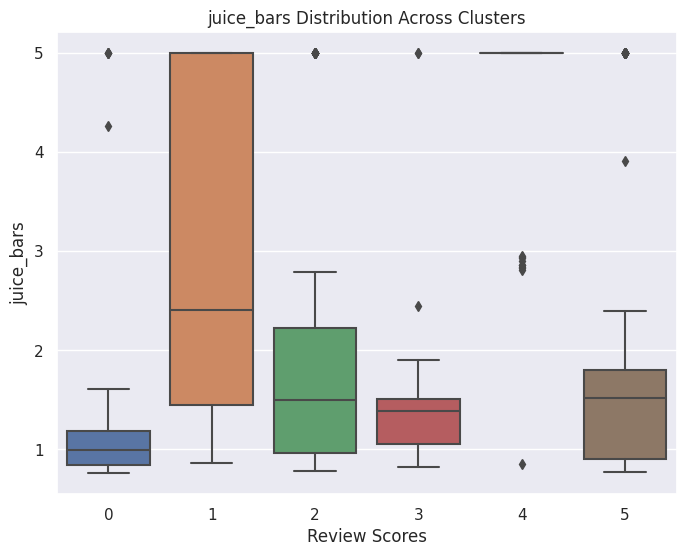

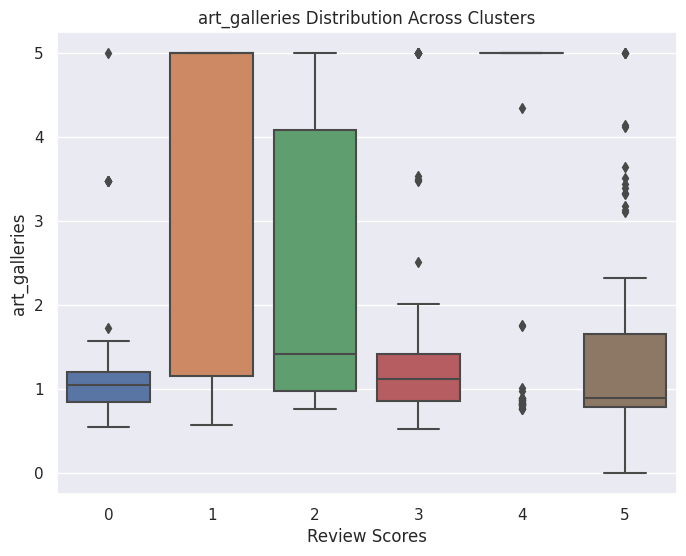

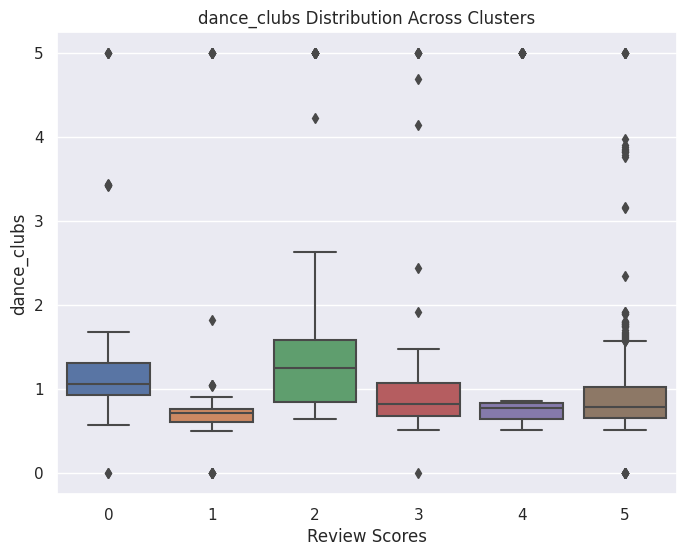

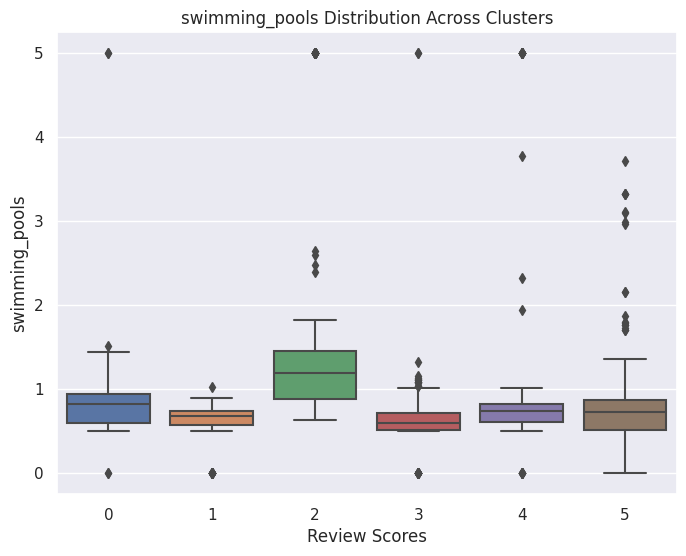

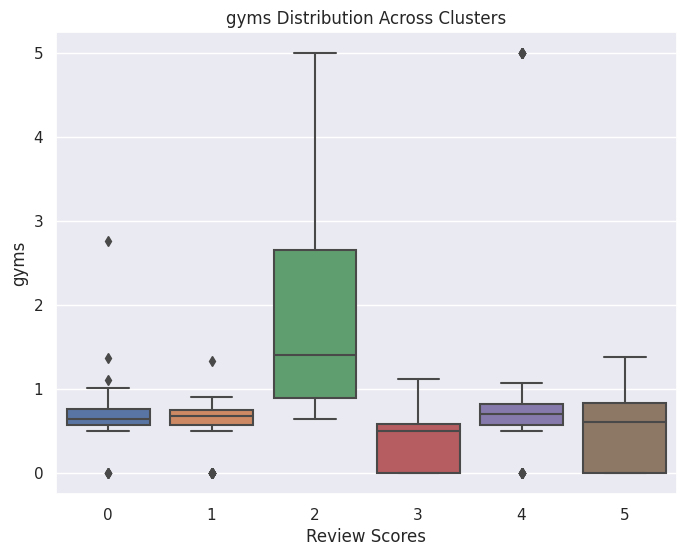

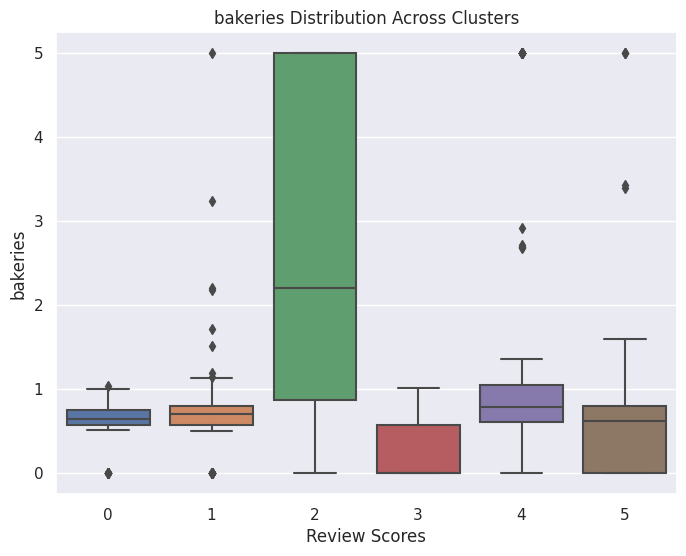

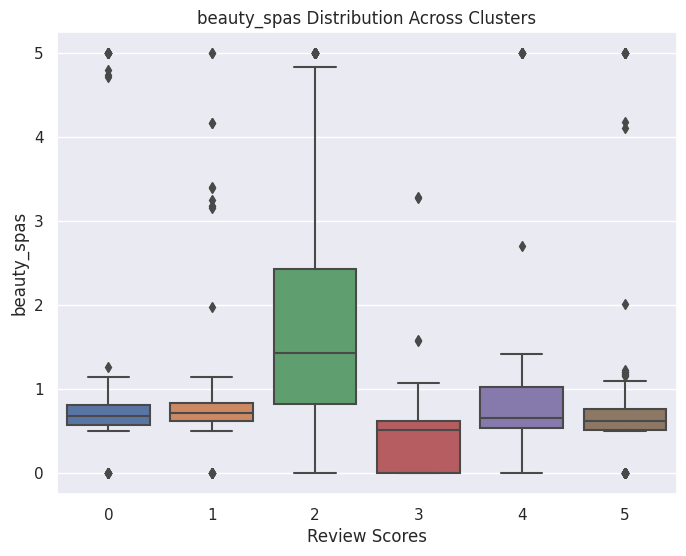

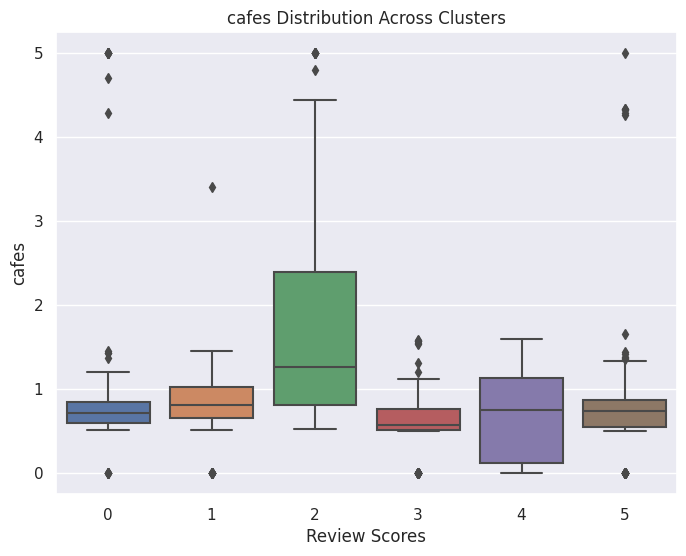

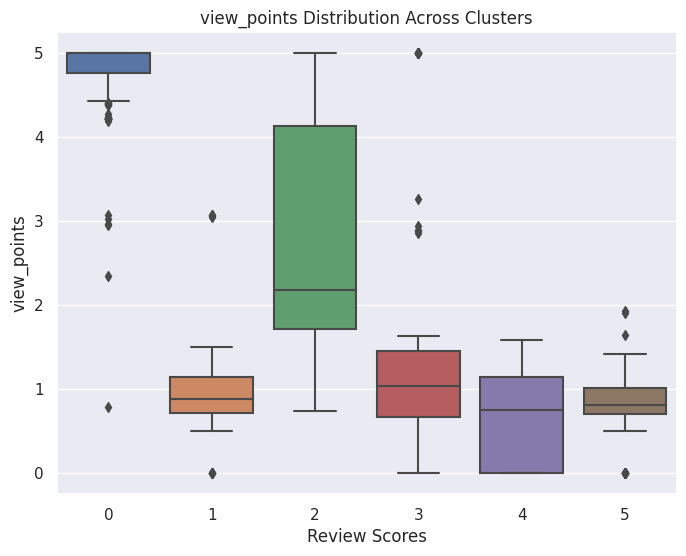

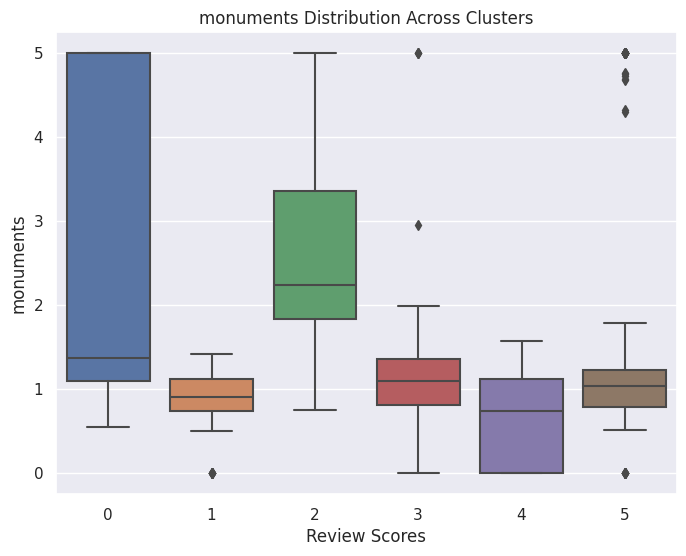

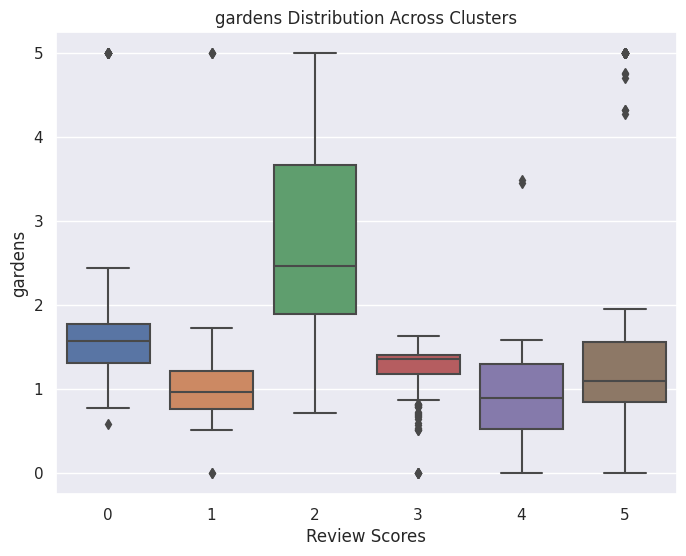

In [29]:
# Add cluster labels to the original DataFrame
numeric_test = numeric.loc[X_test.index].copy()
numeric_test['cluster_label'] = y_pred

# Create feature distribution plots for each cluster
feature_columns = numeric.drop('cluster_label', axis=1).columns

for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster_label', y=feature, data=numeric_test)
    plt.xlabel('Review Scores')
    plt.ylabel(feature)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.show()

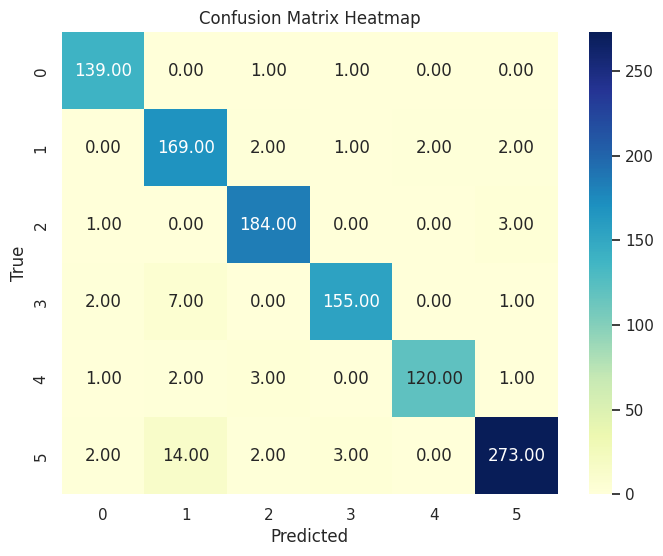

In [33]:
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=range(6), columns=range(6))

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

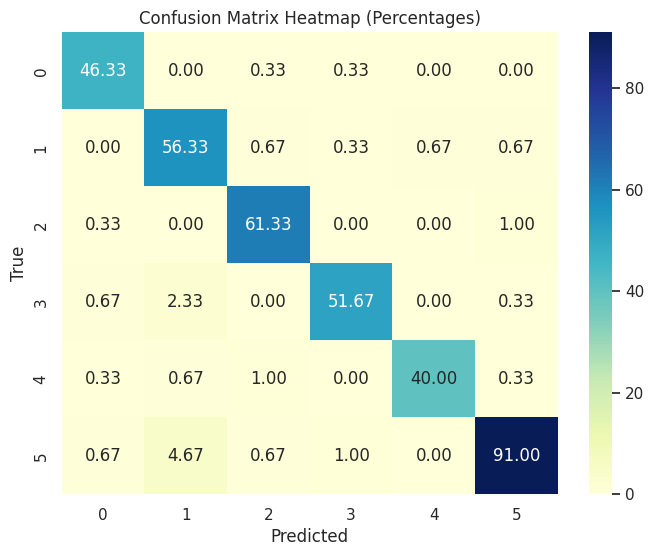

In [46]:
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the percentage for each element in the confusion matrix
cm_percent = (cm / 300) * 100

# Create a DataFrame for the confusion matrix for better visualization
cm_df = pd.DataFrame(cm_percent, index=range(6), columns=range(6))

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (Percentages)')
plt.show()